## Analytics Intern Test
#### Chen-I Huang

## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("brands_data.csv")

## EDA

In [3]:
print("the data have",len(data), "rows")
data.head()

the data have 2041 rows


,name,brand_category,product_category,created,last_active,last_onboarding_step,saw_discovery,address_country
0,Milksnob,/art and entertainment/shows and events,NaN,2018-01-02,2018-06-11,3,False,United States
1,NaN,NaN,NaN,2018-01-02,2018-01-12,1,False,NaN
2,NaN,NaN,NaN,2018-01-03,2018-01-03,1,False,NaN
3,Baseball Much,/sports/baseball,NaN,2018-01-03,2018-01-03,1,False,NaN
4,NaN,NaN,NaN,2018-01-04,2018-01-04,1,False,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2041 entries, 0 to 2040
Data columns (total 8 columns):
name                    782 non-null object
brand_category          233 non-null object
product_category        583 non-null object
created                 2041 non-null object
last_active             2038 non-null object
last_onboarding_step    2041 non-null int64
saw_discovery           2041 non-null bool
address_country         555 non-null object
dtypes: bool(1), int64(1), object(6)
memory usage: 113.7+ KB


In [5]:
dataname = data.groupby("name")["name"].count()
dataname

name
#TXHSFBCHAT                   1
123                           1
18 Under Apparel              1
2nd Wind Health & Wellness    1
313 Sports Brasil             1
                             ..
the Makkerz                   1
trhe                          1
triangle trade                1
under the roof progrm         1
wmbonlineshop                 1
Name: name, Length: 775, dtype: int64

In [6]:
dataname[dataname != 1]

name
Adidas              2
Copper Branch       2
Plumdrop            2
Portman Capital     2
SISU Mouthguards    2
SPONSOR.ME          2
X                   2
Name: name, dtype: int64

## product_category

Text(0.5, 1.0, 'product_category')

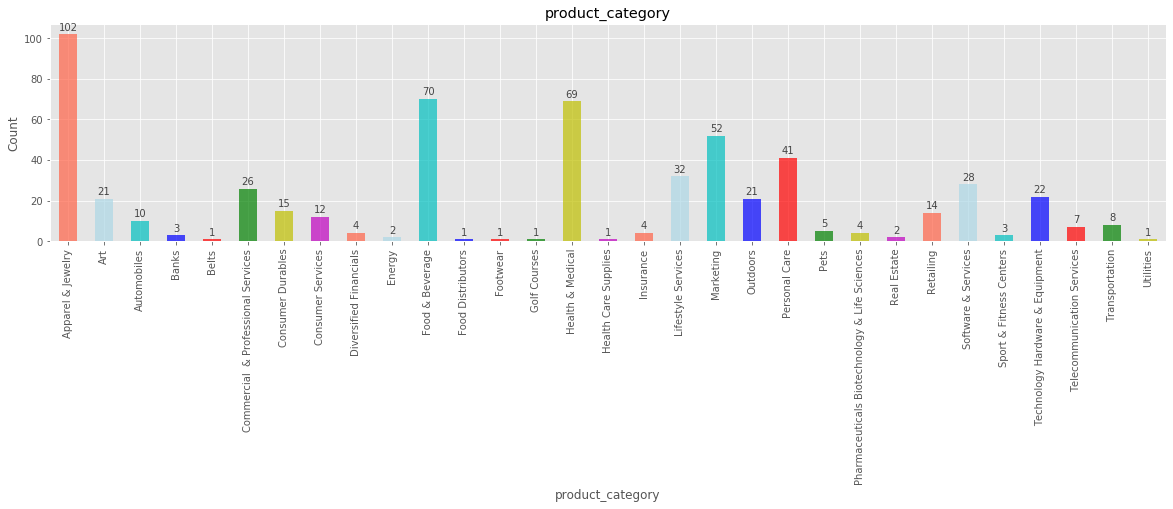

In [7]:
## how many product_category
product_category = data.groupby("product_category")["product_category"].count()
## plot it
data.groupby("product_category")["product_category"].count().plot(kind='bar', figsize=(20, 4), alpha=0.7, color = ["tomato", "lightblue","c", "b", "r", "g", "y", "m"])
for i in range(len(product_category)):
    plt.text(i, product_category[i]+1, product_category[i], ha='center', va= 'bottom',fontsize=10, alpha=0.7)
plt.xlabel("product_category")
plt.ylabel("Count")
plt.title("product_category")

## address_country

Text(0.5, 1.0, 'address_country')

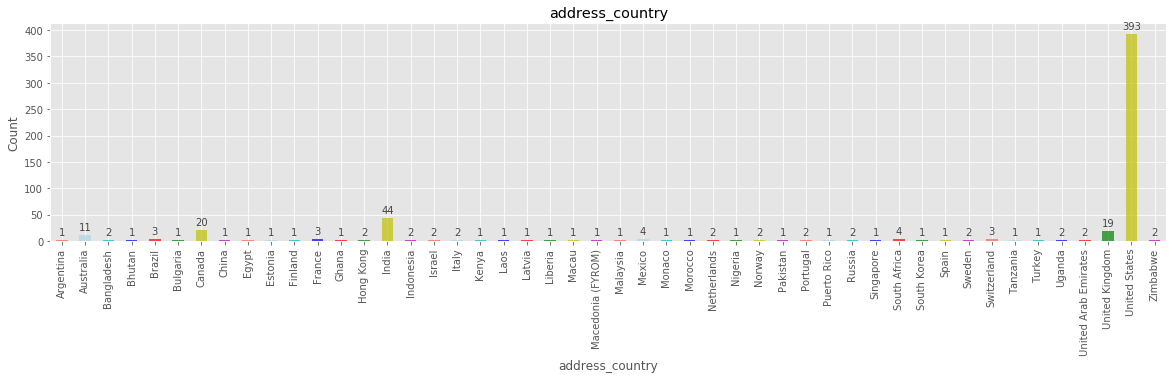

In [8]:
## how many address_country
address_country = data.groupby("address_country")["address_country"].count()
## plot it
data.groupby("address_country")["address_country"].count().plot(kind='bar', figsize=(20, 4), alpha=0.7, color = ["tomato", "lightblue","c", "b", "r", "g", "y", "m"])
for i in range(len(address_country)):
    plt.text(i, address_country[i]+5, address_country[i], ha='center', va= 'bottom',fontsize=10, alpha=0.7)
plt.xlabel("address_country")
plt.ylabel("Count")
plt.title("address_country")

## brand_category

In [9]:
pd.set_option('max_rows', 200)
brand_category = data.groupby("brand_category")["brand_category"].count()
brand_category

brand_category
/art and entertainment                                                                                       1
/art and entertainment/books and literature/fan fiction                                                      1
/art and entertainment/comics and animation                                                                  1
/art and entertainment/dance                                                                                 1
/art and entertainment/movies and tv/movies                                                                  1
/art and entertainment/movies and tv/television                                                              1
/art and entertainment/music/music reference                                                                 1
/art and entertainment/music/singing                                                                         1
/art and entertainment/radio/podcasts                                                            

#### grab out the first category in brand_category

In [10]:
## first_category
first_category = []
for i in range(len(data)):
    if type(data["brand_category"][i]) == float:
        first_category.append(0)
    else:
        b = data["brand_category"][i].split('/')
        first_category.append(b[1])
## add the column first_category
data["first_category"] = first_category

Text(0.5, 1.0, 'first_category')

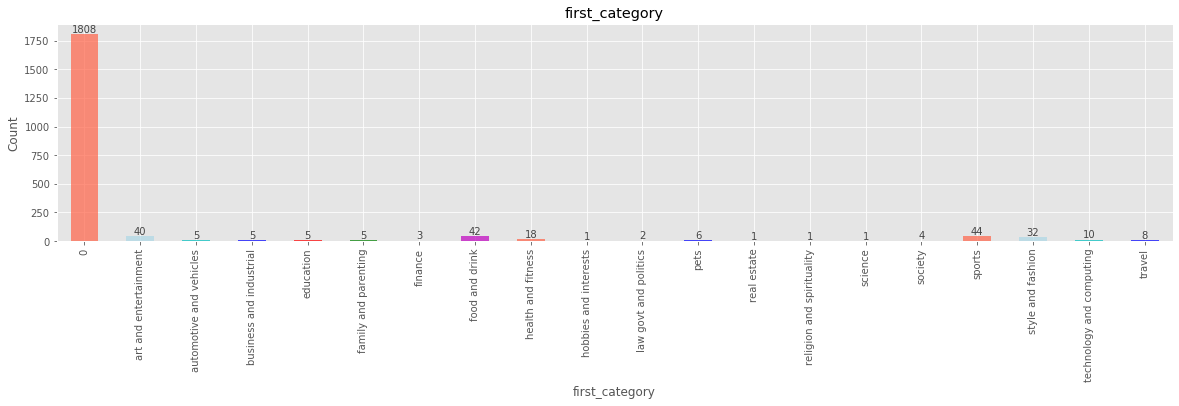

In [11]:
## how many first_category
first_category = data.groupby("first_category")["first_category"].count()
## plot it
data.groupby("first_category")["first_category"].count().plot(kind='bar', figsize=(20, 4), alpha=0.7, color = ["tomato", "lightblue","c", "b", "r", "g", "y", "m"])
x = 0
for i in first_category:
    plt.text(x, i, i, ha='center', va= 'bottom',fontsize=10, alpha=0.7)
    x += 1
plt.xlabel("first_category")
plt.ylabel("Count")
plt.title("first_category")

## created and last_active

Text(0.5, 1.0, 'created')

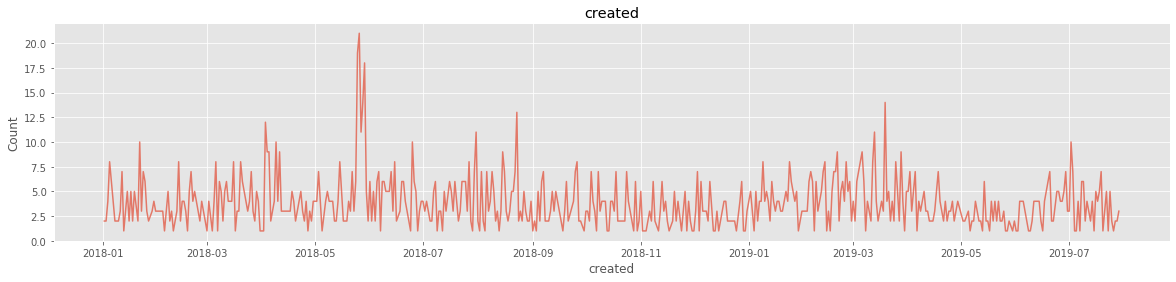

In [12]:
## created
data["created"] = pd.to_datetime(data["created"])
created = data.groupby("created")["created"].count()
## plot it
plt.figure(figsize=(20, 4))
plt.plot(created, alpha=0.7)
plt.xlabel("created")
plt.ylabel("Count")
plt.title("created")

Text(0.5, 1.0, 'last_active')

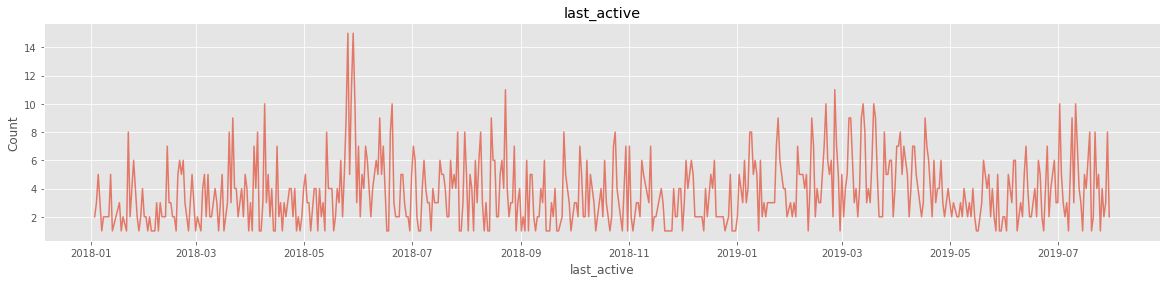

In [13]:
## last_active
data["last_active"] = pd.to_datetime(data["last_active"])
created = data.groupby("last_active")["last_active"].count()
## plot it
plt.figure(figsize=(20, 4))
plt.plot(created, alpha=0.7)
plt.xlabel("last_active")
plt.ylabel("Count")
plt.title("last_active")

## The gap between created and last_active

In [14]:
time_gap = pd.to_datetime(data["last_active"]) - pd.to_datetime(data["created"])
data['time_gap'] = time_gap
## address the data type
a = []
for i in range(len(data)):
    if type(data["time_gap"][i]) == pd._libs.tslibs.nattype.NaTType:
        a.append("NaN")
    else:
        x = np.timedelta64(data["time_gap"][i], 'ns')
        days = x.astype('timedelta64[D]')
        a.append(days / np.timedelta64(1, 'D'))
        
data['time_gap'] = a
data.head()

,name,brand_category,product_category,created,last_active,last_onboarding_step,saw_discovery,address_country,first_category,time_gap
0,Milksnob,/art and entertainment/shows and events,NaN,2018-01-02,2018-06-11,3,False,United States,art and entertainment,160
1,NaN,NaN,NaN,2018-01-02,2018-01-12,1,False,NaN,0,10
2,NaN,NaN,NaN,2018-01-03,2018-01-03,1,False,NaN,0,0
3,Baseball Much,/sports/baseball,NaN,2018-01-03,2018-01-03,1,False,NaN,sports,0
4,NaN,NaN,NaN,2018-01-04,2018-01-04,1,False,NaN,0,0


Text(0.5, 1.0, 'Distribution of time_gap')

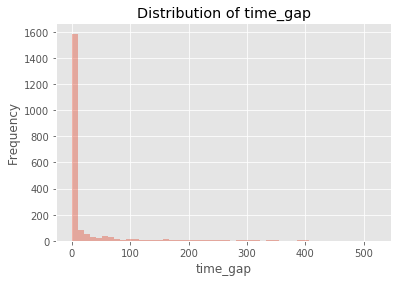

In [15]:
sns.distplot(data['time_gap'][data['time_gap'] != "NaN"], kde= False)
plt.xlabel('time_gap')
plt.ylabel('Frequency')
plt.title('Distribution of time_gap')

## last_onboarding_step	

Text(0.5, 1.0, 'last_onboarding_step')

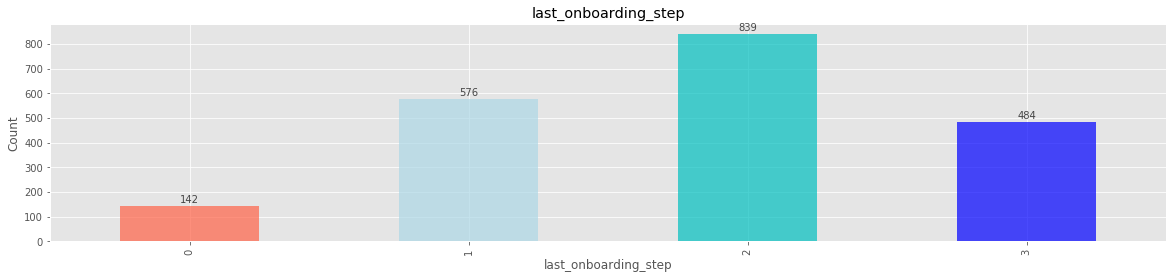

In [16]:
## how many last_onboarding_step
last_onboarding_step = data.groupby("last_onboarding_step")["last_onboarding_step"].count()
## plot it
data.groupby("last_onboarding_step")["last_onboarding_step"].count().plot(kind='bar', figsize=(20, 4), alpha=0.7, color = ["tomato", "lightblue","c", "b", "r", "g", "y", "m"])
for i in range(len(last_onboarding_step)):
    plt.text(i, last_onboarding_step[i]+5, last_onboarding_step[i], ha='center', va= 'bottom',fontsize=10, alpha=0.7)
plt.xlabel("last_onboarding_step")
plt.ylabel("Count")
plt.title("last_onboarding_step")

In [17]:
data

,name,brand_category,product_category,created,last_active,last_onboarding_step,saw_discovery,address_country,first_category,time_gap
0,Milksnob,/art and entertainment/shows and events,NaN,2018-01-02,2018-06-11,3,False,United States,art and entertainment,160
1,NaN,NaN,NaN,2018-01-02,2018-01-12,1,False,NaN,0,10
2,NaN,NaN,NaN,2018-01-03,2018-01-03,1,False,NaN,0,0
3,Baseball Much,/sports/baseball,NaN,2018-01-03,2018-01-03,1,False,NaN,sports,0
4,NaN,NaN,NaN,2018-01-04,2018-01-04,1,False,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...
2036,NaN,NaN,NaN,2019-07-28,2019-07-28,2,False,NaN,0,0
2037,Track Apparel,NaN,Apparel & Jewelry,2019-07-28,2019-07-28,3,False,NaN,0,0
2038,NaN,NaN,NaN,2019-07-29,2019-07-29,2,False,NaN,0,0
2039,Fantisserie,NaN,Consumer Services,2019-07-29,2019-07-29,2,False,United States,0,0
